<a href="https://colab.research.google.com/github/Shruti-425/AIML/blob/main/Experiment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement Dimensionality reduction using Principal Component
Analysis (PCA) method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([ [2.5, 2.4],
                  [0.5, 0.7],
                  [2.2, 2.9],
                  [1.9, 2.2],
                  [3.1, 3.0],
                  [2.3, 2.7],
                  [2, 1.6],
                  [1, 1.1],
                  [1.5, 1.6],
                  [1.1, 0.9]])

In [3]:
# Step 1: Standardize the data (manually)
mean_data = np.mean(data, axis=0)   # Mean of each feature
std_data = np.std(data, axis=0)     # Standard deviation of each feature

In [4]:
#Import the PCA class from the sklearn.decomposition module
from sklearn.decomposition import PCA

In [5]:
# Calculate standardized data
data_standardized = (data - mean_data) / std_data

In [6]:
# Step 2: Apply PCA
pca = PCA(n_components=2)  # Change n_components to the desired number of components
pca.fit(data_standardized) # Changed 'data_stan' to 'data_standardized'
data_pca = pca.transform(data_standardized)

In [7]:
data_standardized = (data - mean_data) / std_data

In [8]:
# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(data_standardized.T)  # Covariance matrix

In [9]:
# Step 3: Compute eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [10]:
# Step 4: Sort the eigenvalues in descending order and sort eigenvectors accordingly
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices of sorted eigenvalues in descending order
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

In [11]:
# Step 5: Select the top k eigenvectors (here we take 2 principal components)
k = 2  # Number of principal components
eigenvectors_reduced = eigenvectors[:, :k]

In [12]:
# Step 6: Project the data onto the new space (principal components)
data_pca = np.dot(data_standardized, eigenvectors_reduced)

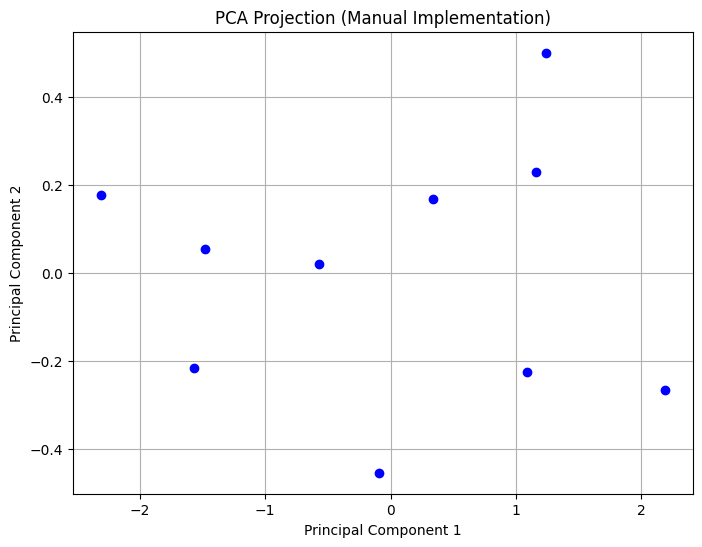

In [13]:
# Step 7: Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='blue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (Manual Implementation)')
plt.grid()
plt.show()

In [14]:
# Print explained variance (eigenvalues represent variance explained by each component)
explained_variance = eigenvalues / np.sum(eigenvalues)
print(f"Explained variance by each principal component: {explained_variance}")

Explained variance by each principal component: [0.96296464 0.03703536]
